In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [36]:
df = pd.read_csv("tree_leaf_species_dataset_5000.csv") 

df.head()


,id,leaf_length_cm,leaf_width_cm,color_score,species,tree_type
0,1,7.017,2.897,0.495,Birch,Deciduous
1,2,6.653,2.546,0.402,Spruce,Coniferous
2,3,3.892,2.610,0.409,Spruce,Coniferous
3,4,4.155,2.674,0.355,Pine,Coniferous
4,5,10.425,3.041,0.672,Maple,Deciduous


In [37]:
print(df.info())
print("Missing values:", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   int64  
 1   leaf_length_cm  5000 non-null   float64
 2   leaf_width_cm   5000 non-null   float64
 3   color_score     5000 non-null   float64
 4   species         5000 non-null   object 
 5   tree_type       5000 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 234.5+ KB
None
Missing values: id                0
leaf_length_cm    0
leaf_width_cm     0
color_score       0
species           0
tree_type         0
dtype: int64


In [38]:
df.head()


,id,leaf_length_cm,leaf_width_cm,color_score,species,tree_type
0,1,7.017,2.897,0.495,Birch,Deciduous
1,2,6.653,2.546,0.402,Spruce,Coniferous
2,3,3.892,2.610,0.409,Spruce,Coniferous
3,4,4.155,2.674,0.355,Pine,Coniferous
4,5,10.425,3.041,0.672,Maple,Deciduous


In [39]:
X = df[["leaf_length_cm",
       "leaf_width_cm",
       "color_score",
      ]]

y = df["species"]


In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


knn.fit(X_scaled, y)


KNeighborsClassifier()

In [42]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.082
Classification Report:
              precision    recall  f1-score   support

         Ash       0.00      0.00      0.00       113
       Birch       0.00      0.00      0.00       104
       Cedar       0.00      0.00      0.00        86
      Cherry       0.00      0.00      0.00       104
       Maple       0.00      0.00      0.00        94
         Oak       0.08      1.00      0.15        82
        Pine       0.00      0.00      0.00       105
      Poplar       0.00      0.00      0.00       100
      Spruce       0.00      0.00      0.00        98
      Willow       0.00      0.00      0.00       114

    accuracy                           0.08      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.08      0.01      1000

Confusion Matrix:
[[  0   0   0   0   0 113   0   0   0   0]
 [  0   0   0   0   0 104   0   0   0   0]
 [  0   0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0 104   0   0   0   0]
 [  0   0   

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

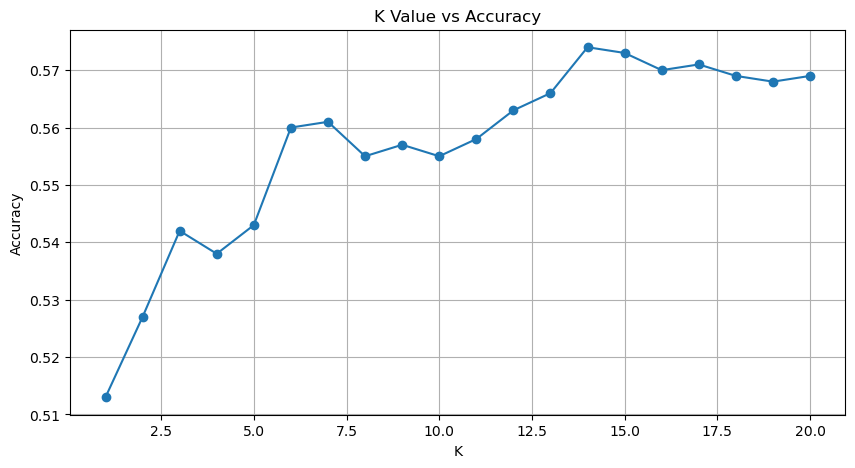

In [43]:
accuracy_scores = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))

plt.figure(figsize=(10,5))
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


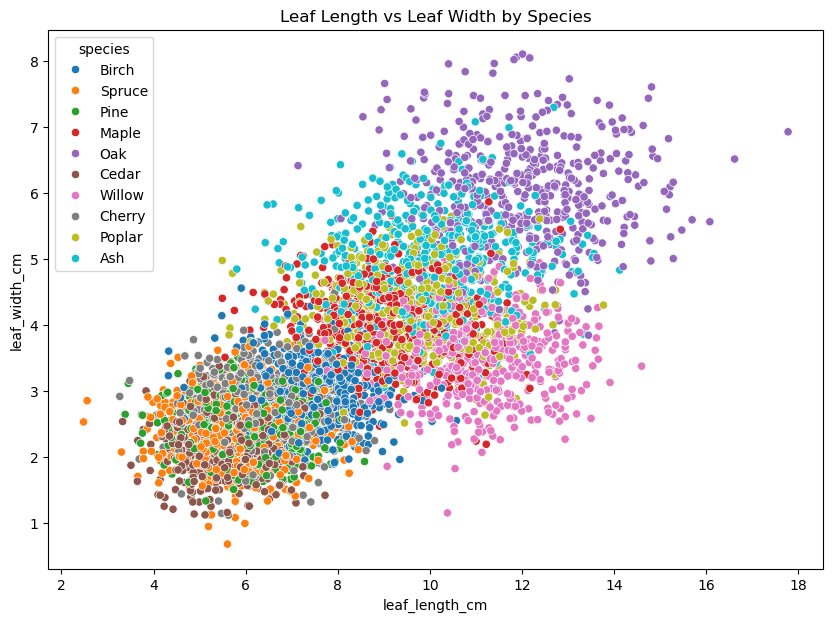

In [44]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='leaf_length_cm', y='leaf_width_cm', hue='species')
plt.title("Leaf Length vs Leaf Width by Species")
plt.show()


In [45]:
import pickle

with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [46]:
df.species

0        Birch
1       Spruce
2       Spruce
3         Pine
4        Maple
         ...  
4995       Ash
4996       Oak
4997    Willow
4998    Cherry
4999     Maple
Name: species, Length: 5000, dtype: object

In [47]:
df['species'].unique()


array(['Birch', 'Spruce', 'Pine', 'Maple', 'Oak', 'Cedar', 'Willow',
       'Cherry', 'Poplar', 'Ash'], dtype=object)